## Artificial Neural Network from Scratch
Created by:
<br> **Titis** Fikri Aji Kusuma
<br> **Titan** Muslim Al-Khan

<br> Reference:
<br> Stefan J.  -  https://github.com/stefan-j/DeepRL/blob/master/NN.py
<br> Syamsuddin, MProdi Matematika - FMIPA ITB

<h3 style= "color:red;font-family:verdana"> GD Optimizer

In [1]:
# import library
import NeuralNetwork as nn
import autograd.numpy as np
from autograd import grad
from datetime import datetime

X = np.array([[0,0], 
              [0,1], 
              [1,0], 
              [1,1]])
y = np.array([[0], 
              [1], 
              [1], 
              [0]])

Ni  = X.shape[1]  #Jumlah features (variables)
Nh1 = 2           #Jumlah neurons di hidden layers pertama
Nh2 = 3           #Jumlah neurons di hidden layers kedua
Nh3 = 4           #Jumlah neurons di hidden layers ketiga
No  = y.shape[1]  #Jumlah neurons di output layer

layers = nn.create_input(Ni)                     #Input layer
layers = nn.add_forward(layers, Nh1, nn.sigmoid)   #Hidden layer pertama
layers = nn.add_forward(layers, Nh2, nn.sigmoid)   #Hidden layer kedua
layers = nn.add_forward(layers, Nh3, nn.sigmoid)   #Hidden layer ketiga
layers = nn.add_forward(layers, No,  nn.sigmoid)   #Output layer

np.random.seed(2020)

w      = nn.init_weights(layers)
alpha  = 3
bs     = 2
grup   = int(len(X)/bs)
epochs = 2500

tic = datetime.now()

losses_GD = []
for epoch in range(0,epochs):

    for item in np.array_split(list(zip(X, y)), grup):
        Xs = [i[0] for i in item]
        ys = [i[1] for i in item]
        Xs = np.transpose(Xs)
        ys = np.transpose(ys).reshape((1,-1))
        c, w = nn.grad_descent(Xs, ys, nn.cost, layers, w, alpha)
    losses_GD.append(c)

    if epoch%(epochs/10) == 0:
        print('Iterasi ke', epoch, 'loss: %7.6f' % c)

print(" ")
yhat = nn.forward_pass(X.T, layers, w)
for ypred, yasli in zip(yhat.T, y):
    print('Nilai prediksi vs nilai aktual : %5.4f' % ypred,'vs %i' % yasli)
    
    
toc = datetime.now()

print("")
print("Waktu yang diperlukan:", toc-tic)

Iterasi ke 0 loss: 0.250821
Iterasi ke 250 loss: 0.269519
Iterasi ke 500 loss: 0.000564
Iterasi ke 750 loss: 0.000216
Iterasi ke 1000 loss: 0.000132
Iterasi ke 1250 loss: 0.000094
Iterasi ke 1500 loss: 0.000073
Iterasi ke 1750 loss: 0.000059
Iterasi ke 2000 loss: 0.000050
Iterasi ke 2250 loss: 0.000043
 
Nilai prediksi vs nilai aktual : 0.0037 vs 0
Nilai prediksi vs nilai aktual : 0.9943 vs 1
Nilai prediksi vs nilai aktual : 0.9940 vs 1
Nilai prediksi vs nilai aktual : 0.0063 vs 0

Waktu yang diperlukan: 0:00:14.266816


<h3 style= "color:red;font-family:verdana"> NAG Optimizer

In [2]:
print("======== NAG optimizer ========\n")
w      = nn.init_weights(layers)
vw     = nn.init_vw(layers)
gamma  = 0.99
alpha  = 3
bs     = 2
grup   = int(len(X)/bs)
epochs = 2500

tic = datetime.now()
vw_1 = 0
vw_2 = 0

losses_NAG = []
for epoch in range(0,epochs):
    
    for i in range(0,len(vw)):
        vw_1 = gamma * vw[i][0]
        vw_2 = gamma * vw[i][0]
        for item in np.array_split(list(zip(X, y)), grup):
            Xs = [i[0] for i in item]
            ys = [i[1] for i in item]
            Xs = np.transpose(Xs)
            ys = np.transpose(ys).reshape((1,-1))
            
            c, w = nn.NAG(Xs, ys, nn.cost, layers, w, vw_1, vw_2, vw, alpha, gamma)
    losses_NAG.append(c)

    if epoch%(epochs/10) == 0:
        print('Iterasi ke', epoch, 'loss: %7.6f' % c)
    #print('os loss', cost(nn.forward_pass(test_xs, layers, weights), test_ys ) )

print(" ")
yhat = nn.forward_pass(X.T, layers, w)
for ypred, yasli in zip(yhat.T, y):
    print('Nilai prediksi vs nilai aktual : %5.4f' % ypred,'vs %i' % yasli)
    
    
toc = datetime.now()

print("")
print("Waktu yang diperlukan:", toc-tic)

======== NAG optimizer ========

Iterasi ke 0 loss: 0.250236
Iterasi ke 250 loss: 0.000146
Iterasi ke 500 loss: 0.000059
Iterasi ke 750 loss: 0.000036
Iterasi ke 1000 loss: 0.000026
Iterasi ke 1250 loss: 0.000020
Iterasi ke 1500 loss: 0.000017
Iterasi ke 1750 loss: 0.000014
Iterasi ke 2000 loss: 0.000012
Iterasi ke 2250 loss: 0.000011
 
Nilai prediksi vs nilai aktual : 0.0028 vs 0
Nilai prediksi vs nilai aktual : 0.9971 vs 1
Nilai prediksi vs nilai aktual : 0.9970 vs 1
Nilai prediksi vs nilai aktual : 0.0032 vs 0

Waktu yang diperlukan: 0:00:55.051149


<h3 style= "color:red;font-family:verdana"> ADAM Optimizer

In [8]:
print("======== ADAM optimizer ========\n")
w = nn.init_weights(layers)
Mw, Vw = nn.init_adam(layers)

alpha = 0.1 
bs = 2
grup = int(len(X)/bs)
epochs = 2500
tic = datetime.now()

losses_ADAM = []
for epoch in range(0, epochs):
    
    for item in np.array_split(list(zip(X, y)), grup):
        Xs = [i[0] for i in item]
        ys = [i[1] for i in item]
        
        Xs = np.transpose(Xs)
        ys = np.transpose(ys).reshape((1, -1))
        
        c, w, Mw, Vw = nn.ADAM(Xs, ys, nn.cost, layers, w, Mw, Vw, alpha)
    losses_ADAM.append(c)
        
    if epoch%(epochs/10) == 0:
        print('Iterasi ke-', epoch, 'loss: %7.6f' %c)
        
print(" ")        
yhat = nn.forward_pass(X.T, layers, w)
for ypred, yasli in zip(yhat.T, y):
    print('Nilai prediksi vs nilai aktual : %5.4f' % ypred, 'vs %i' % yasli)

toc = datetime.now()

print(" ")
print("Waktu yang diperlukan :", toc-tic)

======== ADAM optimizer ========

Iterasi ke- 0 loss: 0.254478
Iterasi ke- 250 loss: 0.000000
Iterasi ke- 500 loss: 0.000000
Iterasi ke- 750 loss: 0.000000
Iterasi ke- 1000 loss: 0.000000
Iterasi ke- 1250 loss: 0.000000
Iterasi ke- 1500 loss: 0.000000
Iterasi ke- 1750 loss: 0.000000
Iterasi ke- 2000 loss: 0.000000
Iterasi ke- 2250 loss: 0.000000
 
Nilai prediksi vs nilai aktual : 0.0000 vs 0
Nilai prediksi vs nilai aktual : 1.0000 vs 1
Nilai prediksi vs nilai aktual : 1.0000 vs 1
Nilai prediksi vs nilai aktual : 0.0000 vs 0
 
Waktu yang diperlukan : 0:00:14.850849


<h3 style= "color:red;font-family:verdana"> RMSprop Optimizer

In [4]:
print("======== RMSprop optimizer ========\n")
w      = nn.init_weights(layers)
vw     = nn.init_vw(layers)
gamma  = 0.99
alpha  = 0.1
bs     = 2
grup   = int(len(X)/bs)
epochs = 2500

tic = datetime.now()
vw_1 = 0
vw_2 = 0

losses_RMS = []
for epoch in range(0,epochs):
    
    for i in range(0,len(vw)):
        for item in np.array_split(list(zip(X, y)), grup):
            Xs = [i[0] for i in item]
            ys = [i[1] for i in item]
            Xs = np.transpose(Xs)
            ys = np.transpose(ys).reshape((1,-1))
            c, w = nn.RMS(Xs, ys, nn.cost, layers, w, vw_1, vw_2, vw, alpha, gamma)
    losses_RMS.append(c)

    if epoch%(epochs/10) == 0:
        print('Iterasi ke', epoch, 'loss: %7.6f' % c)

print(" ")
yhat = nn.forward_pass(X.T, layers, w)
for ypred, yasli in zip(yhat.T, y):
    print('Nilai prediksi vs nilai aktual : %5.4f' % ypred,'vs %i' % yasli)
    
    
toc = datetime.now()

print("")
print("Waktu yang diperlukan:", toc-tic)

======== RMSprop optimizer ========

Iterasi ke 0 loss: 0.258884
Iterasi ke 250 loss: 0.000000
Iterasi ke 500 loss: 0.000000
Iterasi ke 750 loss: 0.000000
Iterasi ke 1000 loss: 0.000000
Iterasi ke 1250 loss: 0.000000
Iterasi ke 1500 loss: 0.000000
Iterasi ke 1750 loss: 0.000000
Iterasi ke 2000 loss: 0.000000
Iterasi ke 2250 loss: 0.000000
 
Nilai prediksi vs nilai aktual : 0.0000 vs 0
Nilai prediksi vs nilai aktual : 1.0000 vs 1
Nilai prediksi vs nilai aktual : 1.0000 vs 1
Nilai prediksi vs nilai aktual : 0.0000 vs 0

Waktu yang diperlukan: 0:00:56.732245


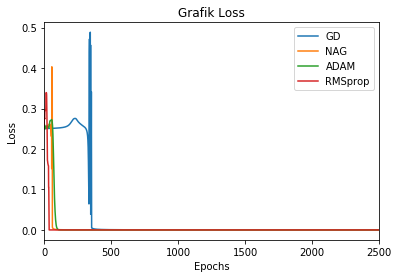

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lgd = pd.DataFrame(losses_GD, columns=['GD'])
lnag = pd.DataFrame(losses_NAG, columns=['NAG'])
ladam = pd.DataFrame(losses_ADAM, columns=['ADAM'])
lrms = pd.DataFrame(losses_RMS, columns=['RMSprop'])

loss = pd.concat([lgd, lnag, ladam, lrms], axis=1)
loss.plot()
plt.title('Grafik Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
loss.head()

,GD,NAG,ADAM,RMSprop
0,0.250821,0.250236,0.254478,0.258884
1,0.250521,0.250311,0.250561,0.267889
2,0.250527,0.250385,0.250759,0.275227
3,0.250534,0.250459,0.254774,0.276262
4,0.250541,0.250532,0.258329,0.276115
